In [1]:
!pip install tensorflow
!pip install yfinance
!pip install pandas_datareader
!pip install datetime
!pip instaall 
!pip install keras

ERROR: unknown command "instaall" - maybe you meant "install"


In [2]:
import numpy as np
from numpy import append
import tensorflow as tf
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web
import datetime  
import pandas_datareader as pdr
import matplotlib.pyplot as plt

import pandas as pd
import datetime
from datetime import date

2023-07-03 22:27:54.289927: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-03 22:27:57.885143: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/local/cuda/extras/CUPTI/lib64
2023-07-03 22:27:57.885295: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/nccl2/lib:/usr/loca

In [4]:
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD , Adam
from sklearn.preprocessing import StandardScaler

In [5]:


df_VOO = pd.read_csv('gs://ml-investiment-input-pipeline/VOO (9).csv' ,index_col='Date', parse_dates=True)


df_VIX = pd.read_csv('gs://ml-investiment-input-pipeline/^VIX (2).csv' ,index_col='Date', parse_dates=True)


df1 = pd.read_csv('gs://ml-investiment-input-pipeline/daily-treasury-rates (8).csv',index_col='Date', parse_dates=True)

df_Tr = df1.iloc[::-1]

In [6]:


df_Tr.head()


,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2023-01-03,4.17,4.42,4.53,4.70,4.77,4.72,4.40,4.18,3.94,3.89,3.79,4.06,3.88
2023-01-04,4.20,4.42,4.55,4.69,4.77,4.71,4.36,4.11,3.85,3.79,3.69,3.97,3.81
2023-01-05,4.30,4.55,4.66,4.75,4.81,4.78,4.45,4.18,3.90,3.82,3.71,3.96,3.78
2023-01-06,4.32,4.55,4.67,4.74,4.79,4.71,4.24,3.96,3.69,3.63,3.55,3.84,3.67
2023-01-09,4.37,4.58,4.70,4.74,4.83,4.69,4.19,3.93,3.66,3.60,3.53,3.83,3.66


In [7]:
df_VOO.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,353.179993,355.040009,347.190002,349.989990,348.554871,4957300
2023-01-04,352.100006,354.559998,349.200012,352.510010,351.064545,3119100
2023-01-05,350.730011,350.799988,348.059998,348.660004,347.230316,3216500
2023-01-06,351.589996,357.670013,348.739990,356.589996,355.127808,3464800
2023-01-09,358.730011,361.730011,356.220001,356.329987,354.868866,3775300


In [8]:
df_VOO.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-06,392.049988,393.790009,391.410004,393.309998,393.309998,2894700
2023-06-07,393.670013,394.760010,391.540009,392.019989,392.019989,3942900
2023-06-08,391.959991,394.730011,391.290009,394.369995,394.369995,3455400
2023-06-09,395.049988,396.929993,394.079987,395.029999,395.029999,3060100
2023-06-12,395.980011,398.684998,395.315002,398.660004,398.660004,3743561


In [9]:
df_Tr.tail()

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2023-06-06,5.15,5.26,5.44,5.44,5.44,5.20,4.51,4.15,3.85,3.78,3.70,4.02,3.87
2023-06-07,5.07,5.26,5.42,5.42,5.43,5.16,4.56,4.21,3.93,3.88,3.79,4.12,3.95
2023-06-08,5.25,5.29,5.38,5.42,5.39,5.12,4.52,4.17,3.87,3.80,3.73,4.05,3.89
2023-06-09,5.25,5.32,5.37,5.45,5.39,5.17,4.59,4.23,3.92,3.84,3.75,4.05,3.89
2023-06-12,5.24,5.31,5.40,5.43,5.38,5.18,4.55,4.16,3.89,3.82,3.73,4.04,3.87


In [10]:
df_VIX.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,23.090000,23.76,22.730000,22.900000,22.900000,0.0
2023-01-04,22.930000,23.27,21.940001,22.010000,22.010000,0.0
2023-01-05,22.200001,22.92,21.969999,22.459999,22.459999,0.0
2023-01-06,22.690001,22.90,21.000000,21.129999,21.129999,0.0
2023-01-09,21.750000,21.98,21.270000,21.969999,21.969999,0.0


In [11]:
df_VIX.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-06-06,14.91,14.97,13.95,13.96,13.96,0.0
2023-06-07,14.14,14.29,13.77,13.94,13.94,0.0
2023-06-08,14.14,14.21,13.53,13.65,13.65,0.0
2023-06-09,13.78,14.14,13.50,13.83,13.83,0.0
2023-06-12,14.44,15.02,14.32,15.01,15.01,0.0


In [12]:
df_VOO['return'] = df_VOO['Close'].pct_change(1)

In [13]:
df_VOO.head()

,Open,High,Low,Close,Adj Close,Volume,return
Date,,,,,,,
2023-01-03,353.179993,355.040009,347.190002,349.989990,348.554871,4957300,NaN
2023-01-04,352.100006,354.559998,349.200012,352.510010,351.064545,3119100,0.007200
2023-01-05,350.730011,350.799988,348.059998,348.660004,347.230316,3216500,-0.010922
2023-01-06,351.589996,357.670013,348.739990,356.589996,355.127808,3464800,0.022744
2023-01-09,358.730011,361.730011,356.220001,356.329987,354.868866,3775300,-0.000729


In [14]:
df_Tr = df_Tr.pct_change(1)

df_Tr.head()

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,0.007194,0.000000,0.004415,-0.002128,0.000000,-0.002119,-0.009091,-0.016746,-0.022843,-0.025707,-0.026385,-0.022167,-0.018041
2023-01-05,0.023810,0.029412,0.024176,0.012793,0.008386,0.014862,0.020642,0.017032,0.012987,0.007916,0.005420,-0.002519,-0.007874
2023-01-06,0.004651,0.000000,0.002146,-0.002105,-0.004158,-0.014644,-0.047191,-0.052632,-0.053846,-0.049738,-0.043127,-0.030303,-0.029101
2023-01-09,0.011574,0.006593,0.006424,0.000000,0.008351,-0.004246,-0.011792,-0.007576,-0.008130,-0.008264,-0.005634,-0.002604,-0.002725


<AxesSubplot: >

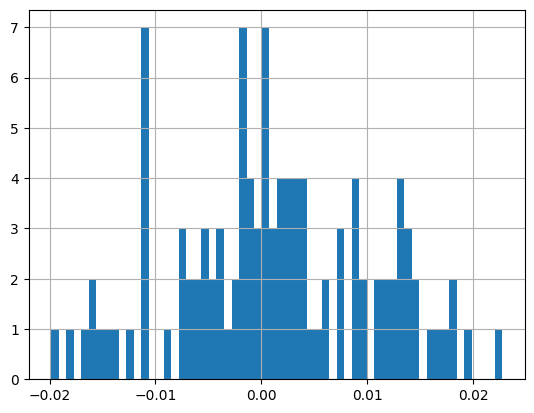

In [15]:
df_VOO['return'].hist(bins=60)

In [16]:
df_VOO['return'].mean(), df_VOO['return'].std()

(0.0012273150332861422, 0.009314443547750843)

array([[<AxesSubplot: title={'center': '1 Mo'}>,
        <AxesSubplot: title={'center': '2 Mo'}>,
        <AxesSubplot: title={'center': '3 Mo'}>,
        <AxesSubplot: title={'center': '4 Mo'}>],
       [<AxesSubplot: title={'center': '6 Mo'}>,
        <AxesSubplot: title={'center': '1 Yr'}>,
        <AxesSubplot: title={'center': '2 Yr'}>,
        <AxesSubplot: title={'center': '3 Yr'}>],
       [<AxesSubplot: title={'center': '5 Yr'}>,
        <AxesSubplot: title={'center': '7 Yr'}>,
        <AxesSubplot: title={'center': '10 Yr'}>,
        <AxesSubplot: title={'center': '20 Yr'}>],
       [<AxesSubplot: title={'center': '30 Yr'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

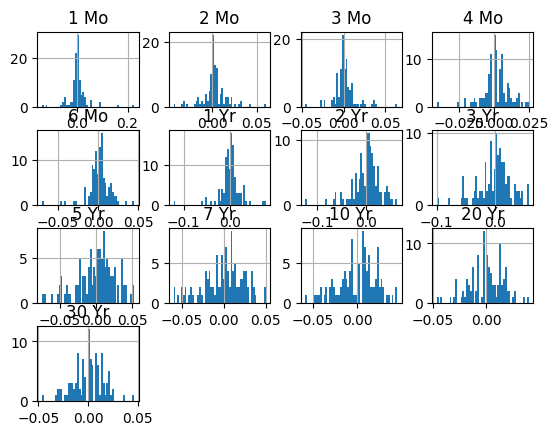

In [17]:
df_Tr.hist(bins=50)

<AxesSubplot: >

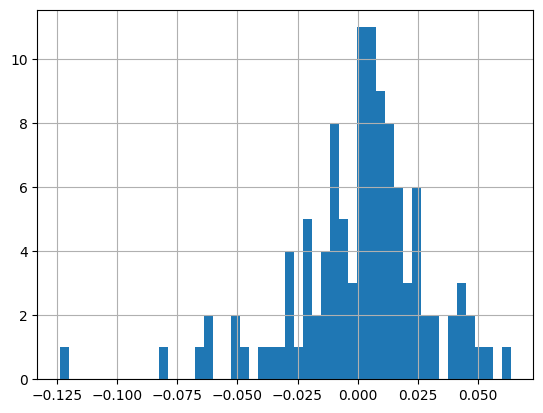

In [18]:
df_Tr['2 Yr'].hist(bins=50)

In [19]:
df_Tr.describe()

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,0.002808,0.001754,0.001673,0.001350,0.001186,0.001100,0.000708,0.000348,0.000239,0.000121,0.000079,0.000083,0.000098
std,0.039575,0.014258,0.013475,0.009835,0.014242,0.022768,0.028320,0.027908,0.026596,0.023864,0.021159,0.016030,0.015655
min,-0.139241,-0.044025,-0.046414,-0.041339,-0.069632,-0.122449,-0.123913,-0.099768,-0.075269,-0.059946,-0.058524,-0.046455,-0.046392
25%,-0.006410,-0.002157,-0.004090,-0.002899,-0.003690,-0.006376,-0.009617,-0.014262,-0.014578,-0.014602,-0.013136,-0.009989,-0.010499
50%,0.000000,0.000000,0.000000,0.001972,0.001980,0.002083,0.004444,0.002817,0.004950,0.002882,0.002841,0.000000,0.000000
75%,0.010554,0.006215,0.005677,0.006110,0.007663,0.008830,0.015352,0.015714,0.016810,0.016206,0.013570,0.013089,0.010458
max,0.225532,0.060000,0.064159,0.025105,0.044397,0.078341,0.063776,0.058659,0.052786,0.050000,0.044379,0.039474,0.046322


<AxesSubplot: xlabel='Date'>

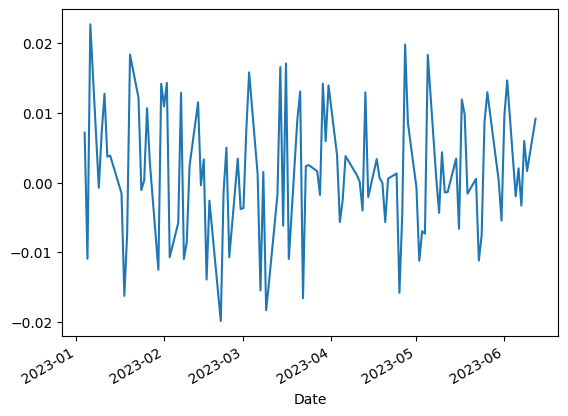

In [20]:
df_VOO['return'].plot()

In [21]:
df_VOO['log_returns'] = np.log(df_VOO['return'] + 1)     

In [22]:
df_VOO.head()

,Open,High,Low,Close,Adj Close,Volume,return,log_returns
Date,,,,,,,,
2023-01-03,353.179993,355.040009,347.190002,349.989990,348.554871,4957300,NaN,NaN
2023-01-04,352.100006,354.559998,349.200012,352.510010,351.064545,3119100,0.007200,0.007174
2023-01-05,350.730011,350.799988,348.059998,348.660004,347.230316,3216500,-0.010922,-0.010982
2023-01-06,351.589996,357.670013,348.739990,356.589996,355.127808,3464800,0.022744,0.022489
2023-01-09,358.730011,361.730011,356.220001,356.329987,354.868866,3775300,-0.000729,-0.000729


In [23]:
df_Tr['log_returns'] = df_VOO['log_returns']
df_Comp =df_Tr
df_Comp['delta_VIX'] = df_VIX['Close'].pct_change(1)
df_Comp.head()

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr,log_returns,delta_VIX
Date,,,,,,,,,,,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,0.007194,0.000000,0.004415,-0.002128,0.000000,-0.002119,-0.009091,-0.016746,-0.022843,-0.025707,-0.026385,-0.022167,-0.018041,0.007174,-0.038865
2023-01-05,0.023810,0.029412,0.024176,0.012793,0.008386,0.014862,0.020642,0.017032,0.012987,0.007916,0.005420,-0.002519,-0.007874,-0.010982,0.020445
2023-01-06,0.004651,0.000000,0.002146,-0.002105,-0.004158,-0.014644,-0.047191,-0.052632,-0.053846,-0.049738,-0.043127,-0.030303,-0.029101,0.022489,-0.059216
2023-01-09,0.011574,0.006593,0.006424,0.000000,0.008351,-0.004246,-0.011792,-0.007576,-0.008130,-0.008264,-0.005634,-0.002604,-0.002725,-0.000729,0.039754


(-0.002098650588960438, 0.058740277610500755)

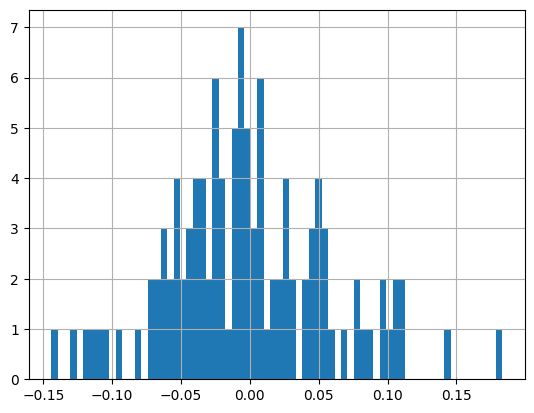

In [32]:
df_Comp['delta_VIX'].hist(bins=70)
df_Comp['delta_VIX'].mean(), df_Comp['delta_VIX'].std()

In [33]:
t_series = df_VOO['log_returns'].values.reshape(-1,1)


In [34]:
t_series[1:100]

array([[ 7.17446494e-03],
       [-1.09817722e-02],
       [ 2.24894044e-02],
       [-7.29419900e-04],
       [ 7.10296069e-03],
       [ 1.26815770e-02],
       [ 3.73489568e-03],
       [ 3.88491674e-03],
       [-1.53025848e-03],
       [-1.63775422e-02],
       [-7.22587687e-03],
       [ 1.82289183e-02],
       [ 1.21065193e-02],
       [-1.05998187e-03],
       [ 3.53452144e-04],
       [ 1.06261541e-02],
       [ 2.84685429e-03],
       [-1.25764169e-02],
       [ 1.41039513e-02],
       [ 1.08926786e-02],
       [ 1.42282911e-02],
       [-1.07379600e-02],
       [-5.79742983e-03],
       [ 1.28203108e-02],
       [-1.10166180e-02],
       [-8.59679546e-03],
       [ 2.42949683e-03],
       [ 1.14799491e-02],
       [-3.69159993e-04],
       [ 3.34352481e-03],
       [-1.40010728e-02],
       [-2.58870722e-03],
       [-2.00543607e-02],
       [-1.25497071e-03],
       [ 5.01029231e-03],
       [-1.07592569e-02],
       [ 3.45332525e-03],
       [-3.78291308e-03],
       [-3.6

In [35]:
scaler = StandardScaler()
scaler.fit(t_series[:len(t_series) //2])
t_series = scaler.transform(t_series).flatten()                   

In [47]:
T = 10
D = 1
X = []
Y = []

for t in range(len(t_series) - T):
    x = t_series[t:t + T]
    X.append(x)
    y = t_series[t+T]
    Y.append(y)
    

X = np.array(X).reshape(-1,T,D)
Y = np.array(Y)
N = len(X)
print('X.shape' , X.shape, "Y.shape", Y.shape, 'N', N)

X.shape (101, 10, 1) Y.shape (101,) N 101


In [49]:

i = Input(shape = (T,1))
x = LSTM(5)(i)
x = Dense(1)(x)

model = Model(i,x)
model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.01),
              
             )

r = model.fit(
    X[:-N//2], Y[:-N//2] , 
    epochs=80, 
    validation_data=(X[-N//2:] ,Y[-N//2:]),
             )

Epoch 1/80
2/2 [==============================] - 3s 485ms/step - loss: nan - val_loss: nan
Epoch 2/80
2/2 [==============================] - 0s 40ms/step - loss: nan - val_loss: nan
Epoch 3/80
2/2 [==============================] - 0s 39ms/step - loss: nan - val_loss: nan
Epoch 4/80
2/2 [==============================] - 0s 40ms/step - loss: nan - val_loss: nan
Epoch 5/80
2/2 [==============================] - 0s 38ms/step - loss: nan - val_loss: nan
Epoch 6/80
2/2 [==============================] - 0s 39ms/step - loss: nan - val_loss: nan
Epoch 7/80
2/2 [==============================] - 0s 37ms/step - loss: nan - val_loss: nan
Epoch 8/80
2/2 [==============================] - 0s 39ms/step - loss: nan - val_loss: nan
Epoch 9/80
2/2 [==============================] - 0s 36ms/step - loss: nan - val_loss: nan
Epoch 10/80
2/2 [==============================] - 0s 37ms/step - loss: nan - val_loss: nan
Epoch 11/80
2/2 [==============================] - 0s 38ms/step - loss: nan - val_loss: 

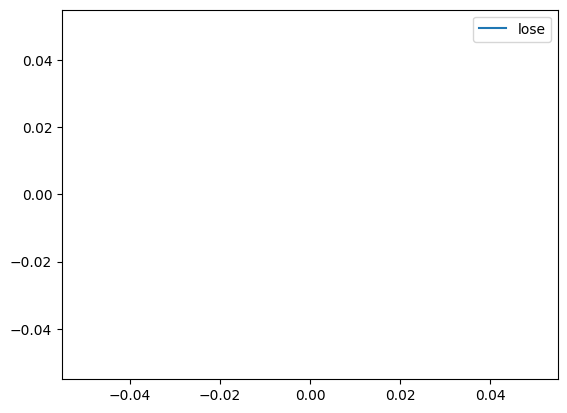

In [38]:
plt.plot(r.history['loss'] , label = 'lose')
plt.legend()              